# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

In [ ]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks

In [ ]:
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data file

In [ ]:
data = pd.read_csv('/content/Data_yield.csv')

data.head(4)

,ID,Year,X,Y,NAME_1,NAME_2,Obs_Rice_Area,Obs_Rice_Yield,evi_max,evi_min,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
0,821,2022,91,28,Bumthang,Chhoekhor,2.57600,16793.152170,13226.82702,6889.660860,...,100.016886,13.731611,4.476897,76.152740,12.533074,2.085379,74.541056,10.684446,-2.986780,45.919324
1,616,2021,91,28,Bumthang,Chhoekhor,60.74167,1714.470001,12515.61824,8998.825936,...,115.722979,13.302864,3.989104,149.417516,12.274395,1.871114,48.987719,12.329681,-1.510479,45.596184
2,1,2018,91,28,Bumthang,Chhoekhor,70.17000,1775.000000,13097.42788,7355.621188,...,119.262165,12.922930,3.699045,99.723568,12.376478,1.428507,38.884149,8.456682,-4.955404,9.965166
3,411,2020,91,28,Bumthang,Chhoekhor,83.64000,1714.000478,12665.98141,7230.824383,...,186.649180,13.977701,4.664496,100.339302,13.001918,2.606503,103.030818,12.855059,-0.986551,17.580759


In [ ]:

df = data[['ID', 'Year','X','Y','May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation','evi_max', 'evi_min', 'evi_mean',
                      'evi_count','evi_stdDev','evi_variance','slope','elevation','Obs_Rice_Yield']]

In [ ]:
X = df.drop('Obs_Rice_Yield',axis=1)
y = df['Obs_Rice_Yield']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
!pip install scikit-learn
from sklearn.neural_network import MLPRegressor


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

mlp = MLPRegressor(hidden_layer_sizes=(500,100,80,20), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(500, 100, 80, 20), max_iter=500,
             random_state=42)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Predict on test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2612459.0302749365


In [ ]:
# Compute RMSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

r2  = r2_score(y_test, y_pred)

rmse, r2

(1616.310313731536, 0.9255560161357315)

(0.0, 5000.0)

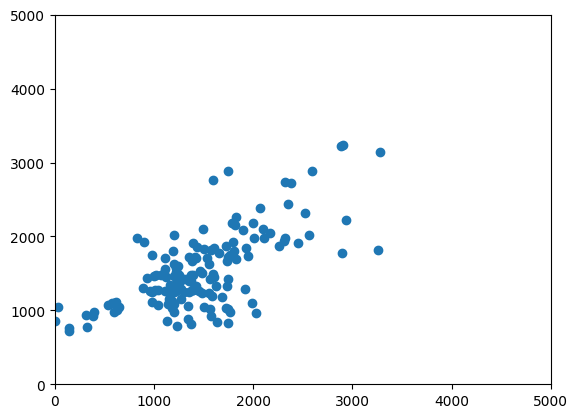

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

# Set axis limits so that both axix are the same
plt.xlim(0, 5000)
plt.ylim(0, 5000)

In [ ]:
# Export results to a CSV file
results_df = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_pred})
results_df.to_csv('yield_prediction_results.csv', index=False)

In [ ]:
# Concatenate input features, actual yield, and predicted yield
output_data = np.column_stack((X_test, y_test, y_pred))

# Print the shape of the output_data array
print(output_data.shape)

# Create a DataFrame from the concatenated array with 30 columns
output_df = pd.DataFrame(output_data, columns=[ 'ID', 'Year','X','Y','May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation','evi_max', 'evi_min', 'evi_mean',
                      'evi_count','evi_stdDev','evi_variance','slope','elevation', 'Actual Yield','Predicted Yield'])

# Print the output DataFrame
print(output_df)

(183, 32)
         ID    Year     X     Y   May_Tmax   May_Tmin  May_Precipitation  \
0      90.0  2018.0  90.0  28.0  23.534474  14.405635         108.455091   
1    1012.0  2022.0  90.0  28.0  21.128557  10.887478         101.978097   
2     700.0  2021.0  91.0  27.0  24.012987  15.108410         146.429292   
3     701.0  2021.0  90.0  28.0  22.908544  13.490104         163.366273   
4     292.0  2019.0  90.0  28.0  22.971572  12.708491         135.053891   
..      ...     ...   ...   ...        ...        ...                ...   
178    49.0  2018.0  91.0  27.0  24.726894  15.892296          97.064060   
179   796.0  2021.0  90.0  27.0  26.947937  19.086111         258.740741   
180   541.0  2020.0  91.0  27.0  27.276812  19.355274         472.992573   
181  1018.0  2022.0  91.0  27.0  24.553011  15.852619         206.352681   
182   162.0  2018.0  92.0  27.0  20.787547  10.886630         102.704693   

     June_Tmax  June_Tmin  June_Precipitation  ...      evi_max       evi_min

In [ ]:
import pandas as pd

# Assuming df1 and df2 are your dataframes
merged_df = pd.merge(data, output_df, on='ID')


In [ ]:
print(merged_df)

       ID  Year_x  X_x  Y_x    NAME_1     NAME_2  Obs_Rice_Area  \
0     822    2022   91   27  Bumthang     Chhume       0.068000   
1     622    2021   90   27   Chhukha   Chapchha      23.950080   
2       8    2018   90   27   Chhukha      Darla     165.640000   
3     213    2019   90   27   Chhukha      Darla     218.060000   
4     419    2020   89   27   Chhukha     Dungna      52.860000   
..    ...     ...  ...  ...       ...        ...            ...   
178   613    2020   91   27  Zhemgang   Pangkhar      20.530000   
179   819    2021   91   27  Zhemgang  Shingkhar     102.766985   
180   204    2018   91   27  Zhemgang  Shingkhar     112.010000   
181  1025    2022   91   27  Zhemgang      Trong      13.476000   
182   410    2019   91   27  Zhemgang      Trong     179.480000   

     Obs_Rice_Yield    evi_max_x     evi_min_x  ...    evi_max_y  \
0      14940.000000  12741.50914   5661.212651  ...  12741.50914   
1       1566.203704  10297.33911   8460.205350  ...  10297.

In [ ]:
# Export results to a CSV file
output_df.to_csv('yield_prediction_results_with_inputs.csv', index=False)
merged_df.to_csv('yield_prediction_results_with_inputs_merged.csv', index=False)


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
shapefile_path = '/content/Bhutan_districts.shp'
gdf = gpd.read_file(shapefile_path)

In [ ]:
print(gdf)

   ENGTYPE_1 COUNTRY GID_0         NL_NAME_1  ISO_1 HASC_1 CC_1     TYPE_1  \
0   District  Bhutan   BTN                ??     NA  BT.HA   NA  Dzongkhag   
1   District  Bhutan   BTN    ??????????????  BT-33  BT.BU   NA  Dzongkhag   
2   District  Bhutan   BTN      ????????????  BT-12  BT.CK   NA  Dzongkhag   
3   District  Bhutan   BTN     ?????????????  BT-GA  BT.GA   NA  Dzongkhag   
4   District  Bhutan   BTN     ?????????????  BT-11  BT.PR   NA  Dzongkhag   
5   District  Bhutan   BTN   ???????????????  BT-23  BT.PN   NA  Dzongkhag   
6   District  Bhutan   BTN  ????????????????  BT-22  BT.DA   NA  Dzongkhag   
7   District  Bhutan   BTN   ???????????????  BT-42  BT.MO   NA  Dzongkhag   
8   District  Bhutan   BTN   ???????????????  BT-14  BT.SM   NA  Dzongkhag   
9   District  Bhutan   BTN  ????????????????  BT-32  BT.TO   NA  Dzongkhag   
10  District  Bhutan   BTN    ??????????????  BT-21  BT.CR   NA  Dzongkhag   
11  District  Bhutan   BTN  ????????????????     NA  BT.TY   NA 

In [ ]:
# Join data to shapefile
gdf = gdf.merge(merged_df, left_on='NAME_1', right_on='NAME_1', how='left')


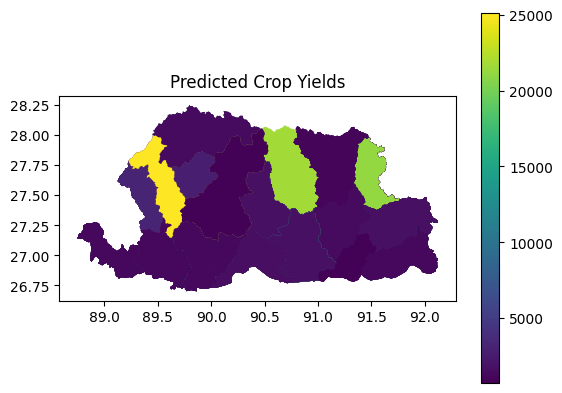

In [ ]:
# Plot shapefile with predicted yield
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Predicted Yield', ax=ax, legend=True)
plt.title('Predicted Crop Yields')
plt.show()

In [ ]:
print(gdf)

    ENGTYPE_1 COUNTRY GID_0         NL_NAME_1  ISO_1 HASC_1 CC_1     TYPE_1  \
0    District  Bhutan   BTN                ??     NA  BT.HA   NA  Dzongkhag   
1    District  Bhutan   BTN    ??????????????  BT-33  BT.BU   NA  Dzongkhag   
2    District  Bhutan   BTN      ????????????  BT-12  BT.CK   NA  Dzongkhag   
3    District  Bhutan   BTN      ????????????  BT-12  BT.CK   NA  Dzongkhag   
4    District  Bhutan   BTN      ????????????  BT-12  BT.CK   NA  Dzongkhag   
..        ...     ...   ...               ...    ...    ...  ...        ...   
179  District  Bhutan   BTN  ????????????????  BT-24  BT.WP   NA  Dzongkhag   
180  District  Bhutan   BTN  ????????????????  BT-24  BT.WP   NA  Dzongkhag   
181  District  Bhutan   BTN  ????????????????  BT-24  BT.WP   NA  Dzongkhag   
182  District  Bhutan   BTN  ????????????????  BT-24  BT.WP   NA  Dzongkhag   
183  District  Bhutan   BTN  ????????????????  BT-24  BT.WP   NA  Dzongkhag   

                            VARNAME_1     GID_1  ..